In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import sys
import copy

import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###
# # Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [2]:
# import dataset (comes with colab!)
data = np.loadtxt(open("../Datasets/mnist_train.csv", "rb"), delimiter=",")

# don't need labels!
data = data[:, 1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor(dataNorm).float()

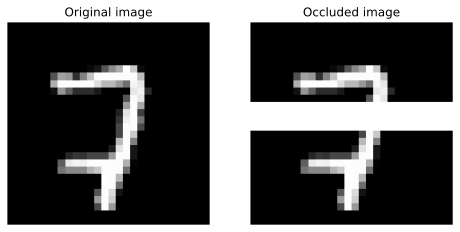

In [9]:
# reconstruct a sample as an image

img = dataT[18346, :].view(28, 28)


occluded = copy.deepcopy(img)
occluded[11:15, :] = 1

fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].imshow(img.cpu(), cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")

ax[1].imshow(occluded.cpu(), cmap="gray")
ax[1].set_title("Occluded image")
ax[1].axis("off")

plt.show()